In [2]:
%matplotlib inline
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib.ticker import AutoMinorLocator
matplotlib.rcParams.update({'font.size': 10})

matplotlib.rcParams['lines.linewidth'] = 0.5

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 1.5

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 1.5

In [ ]:
print ('test')
def martians_year(ls, data):
    #### only looking at "second year"
    idx = np.where(ls==360)[0]
    if idx[0] != 0 and idx.size > 1:
        idx0 = idx[0]
        idx1 = idx[1]
        return data[idx0:idx1]
    elif idx[0] != 0 and idx.size == 1:
        idx1 = idx[0]
        return data[:idx1]
    elif idx[0] == 0:
        idx1 = idx[1]
        idx2 = idx[2]
        return data[idx1:idx2]

def martians_month(ls, data):
    temp = []
    for i in np.arange(0, 12):
        idx = np.where((ls>i*30)&(ls<(i+1)*30))[0]
        temp.append(data[idx].mean(axis=0))
    temp = np.array(temp)
    return temp

In [ ]:
filedir = ./../fullfield/r14p1/'
ls = np.load(filedir + 'wrfout_LS.npy')

tfull = np.load(filedir + 'wrfout_ TFULL.npy')
tfull2 = np.load(filedir + 'wrfout_ TFULL2.npy')

pfull = np.load(filedir + 'wrfout_ PFULL.npy')
pfull2 = np.load(filedir + 'wrfout_ PFULL2.npy')

tfull = np.concatenate((tfull, tfull2), axis =0)
pfull = np.concatenate((pfull, pfull2), axis =0)
del tfull2, pfull2

tfull = martians_year(ls, tfull) [:5328]
pfull = martians_year(ls, pfull) [:5328]

tfull = tfull.reshape((12, 444, 52, 36, 72))
pfull = pfull.reshape((12, 444, 52, 36, 72))

print ('processing done!')

In [20]:
tfull = tfull# - tfull.mean(axis=-1)[:,:,:,:,np.newaxis]

#Tfft = []
#for i in tqdm(np.arange(12)):
Tfft = (np.fft.fftshift(np.fft.fft2(tfull[0], axes=[0,3]), axes=[0,3]))
#Tfft = np.array(Tfft)

#Tfft = np.conj(Tfft[:,:,:,:,:36][::-1]) + Tfft[:,:,:,:,36:]

(18723.737122+3041.89508132j)


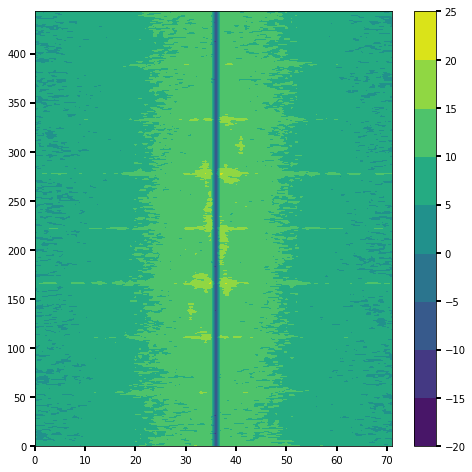

In [21]:
plt.figure(figsize=(8,8))
plt.contourf(np.log(np.abs(Tfft[:,42,:,:].mean(axis=1))**2))
plt.colorbar()
print (np.max(Tfft[:,42,:,:].mean(axis=1)))

[-36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22.
 -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.
  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.
   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.
  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.]
(444, 52, 36, 72)
(400, 52, 36, 71)
0 1
(2.37176223656+9.87543569574j)


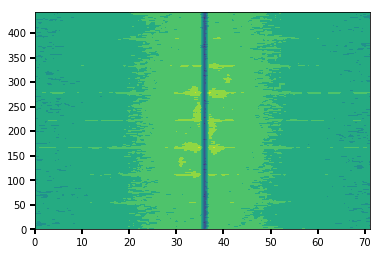

In [37]:
freq = np.fft.fftshift(np.fft.fftfreq(444, 180/1440.))
waven = np.fft.fftshift(np.fft.fftfreq(72, 5.))*360 
print (waven)
#Tfft[:,:,:,:,0] = Tfft[:,:,:,:,0]/2.

print (Tfft.shape)
m0_comp = []
period = [1]
#for p in tqdm(period):
idx_waven = np.where(abs(waven)!=0)[0]
idx_period = np.where((abs(freq)>1.2)|(abs(freq)<0.8))[0]
print (Tfft[idx_period,:,:,:][:,:,:,idx_waven].shape)
Tfft[idx_period,:,:,:][:,:,:,idx_waven] = 0
print (idx_waven[0], idx_period[1])
print (Tfft[1,23,10,0])
plt.contourf(np.log(np.abs(Tfft[:,42,:,:].mean(axis=1))**2))
    #Tfft[:,idx_period,:,:,:] = 0
    
#T = []
#for i in (np.arange(1)):
#    print (np.fft.ifft2(np.fft.ifftshift(Tfft[i], axes=[0,3]), axes=[0,3]))
#    T.append(np.fft.ifft2(np.fft.ifftshift(Tfft[i], axes=[0,3]), axes=[0,3]))
#T = np.array(T)
    #m0_comp.append(Tfft[:,idx_period,:,:,idx_waven].mean(axis=0))
#m0_comp = np.array(m0_comp)
#print (m0_comp[0].shape)
    

#print (Tfft[0,:,16].mean(axis=1).shape)
#plt.figure(figsize=(12,12))
#plt.contourf(np.linspace(-90,90,36), np.linspace(900,1e-2,52), np.abs(m0_comp[2][0]))
#plt.yscale('log')
#plt.ylim([900,1e-2])

C:\Users\visal\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:2761: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


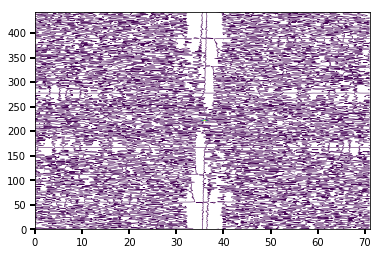

In [86]:
waven
plt.contour(b[0,:,16,:,:].mean(axis=1))


(900, 0.01)

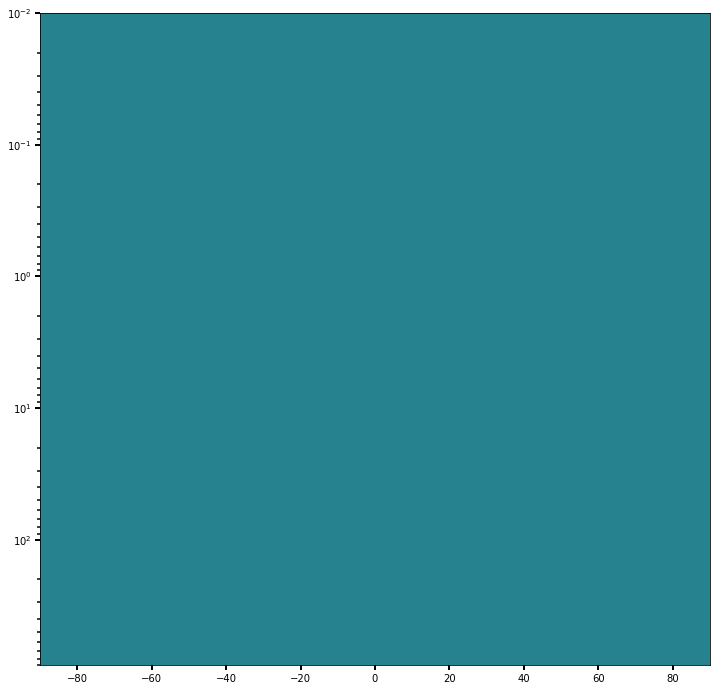

In [67]:
a = T.mean(axis=4).mean(axis=1)
a.shape

plt.figure(figsize=(12,12))
plt.contourf(np.linspace(-90,90,36), np.linspace(900,1e-2,52), np.abs(a[0]))
plt.yscale('log')
plt.ylim([900,1e-2])